# Mini-Projeto: Simulação de Jogo de Dados
## Objetivo

Criar uma simulação para um jogo de dados. Essa simulação tem como objetivo reunir estatísticas para analisar a justiça do jogo, possíveis resultados e fazer previsões sobre jogos futuros.

## Desafios do Projeto

1. **Simulação de Dados**: Crie uma função que simule o lançamento de dois dados de seis lados (valores de 1 a 6). Esta função deve retornar a soma dos resultados dos dados.

2. **Múltiplas Simulações**: Use a função do passo 1 para simular um grande número de jogos de dados (digamos, 1000 jogos). Armazene o resultado de cada jogo em um array NumPy.

3. **Análise de Dados**: Agora, vamos analisar os resultados desses jogos. Calcule e imprima o seguinte:
- A média dos resultados.
- O lançamento máximo e mínimo.
- O número de vezes que cada possível lançamento (2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12) ocorreu.
- Teste de Hipótese: Agora vamos fazer um pouco de teste de hipóteses:
  - Supondo um jogo justo (ou seja, todos os lançamentos são igualmente prováveis), o resultado da sua simulação coincide com essa suposição? Por que sim ou por que não?
  - O que isso significa para um jogador do jogo de dados?

In [44]:
def lancamento_dados(N):
  '''Esta função tem como objetivo simular o lançamento de 2 dados
  e então somar o resultado obtido'''

  #Gerando dois valores random para 2 dados de face 1-6
  #Obs.: High value do randint é excludente-> por isso 7
  dados=np.random.randint(1,7, size=(N,2))
  return np.sum(dados,axis=1)#soma

In [54]:
import numpy as np

try:
  qtde_vezes=int(input('Quantos jogos ocorreram? (Ex.: 1000) '))
except:
  print('Por favor, insira um número inteiro.')
  qtde_vezes=int(input('Quantos jogos ocorreram? (Ex.: 1000) '))

multiplas_simu=lancamento_dados(qtde_vezes)

Quantos jogos ocorreram? (Ex.: 1000) 1000


In [55]:
#Média dos Resultados
media=multiplas_simu.mean()
print(f'Média dos Resultados: {media:.2f}')

#Lançamento Máximo e Mínimo
maximo=multiplas_simu.max()
print(f'Lançamento Máximo: {maximo}')

minimo=multiplas_simu.min()
print(f'Lançamento Mínimo: {minimo}')

#O número de vezes que cada possível lançamento ocorreu
nr_vezes=np.unique(multiplas_simu, return_counts=True)
dict_nr_elementos=dict(zip(nr_vezes[0],nr_vezes[1]))

#Adicionando as somas que não ocorreram como chave, possuindo elemento igual a 0
for i in range (2,13):
  if i not in dict_nr_elementos.keys():
    dict_nr_elementos[i]=0

dictlancamentos=dict(sorted(dict_nr_elementos.items()))
print(f'Número de vezes que cada possível lançamento ocorreu: \n{dictlancamentos}')


Média dos Resultados: 6.97
Lançamento Máximo: 12
Lançamento Mínimo: 2
Número de vezes que cada possível lançamento ocorreu: 
{2: 24, 3: 60, 4: 90, 5: 110, 6: 125, 7: 189, 8: 140, 9: 95, 10: 80, 11: 58, 12: 29}


##Teste de Hipótese

De forma lúdica, temos as seguintes probabilidades ao somar o resultado de 2 pares de dados:


| Resultado | Combinações        |
|---------  |-----------------|
|    2      | (1,1)            |
|    3      | (1,2),(2,1)      |
|    4      | (1,3),(3,1),(2,2)   |
|    5      | (2,3),(3,2),(1,4),(4,1)         |
|    6      | (1,5),(5,1),(2,4),(4,2),(3,3) |
|    7      | (1,6),(6,1),(2,5),(5,2),(3,4),(4,3)           |
|    8     | (2,6),(6,2),(3,5),(5,3),(4,4)        |
|    9     | (6,3),(3,6),(4,5),(5,4)        |
|    10     | (4,6),(6,4),(5,5)        |
|    11     | (6,5),(5,6)        |
|    12     | (6,6)

Logo não há a possibilidade da probabilidade ser igual em todos os casos e é o que a simulação provou. Podemos ver a mesma distribuição no gráfico plotado abaixo:

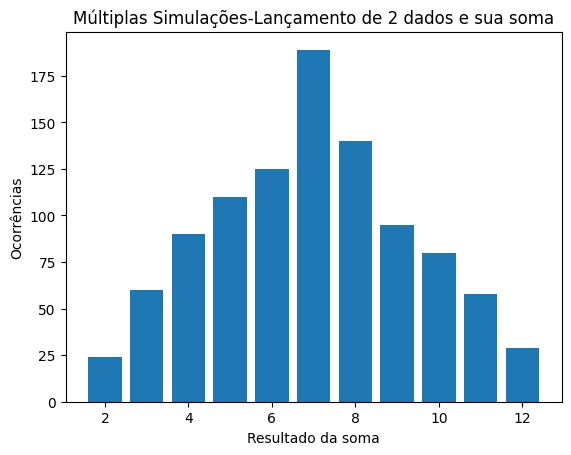

In [73]:
import matplotlib.pyplot as plt

#Viisualizando a distribuição de probabilidades
plt.bar(dictlancamentos.keys(), dictlancamentos.values())
plt.xlabel('Resultado da soma')
plt.ylabel('Ocorrências')
plt.title('Múltiplas Simulações-Lançamento de 2 dados e sua soma')
plt.show ()

Visualizando a distribuição de probabilidades, podemos observar que ela se assemelha a de uma distribuição normal, este que é normal em fenômenos naturais. Logo, para um jogador de dados, é preferível apostar na soma 7, pois a probabilidade de sair esta soma é maior.